Import required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# read dataset
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

*   market_id : integer id for the market where the restaurant lies
*   created_at : the timestamp at which the order was placed
*   actual_delivery_time : the timestamp when the order was delivered

*   store_primary_category : category for the restaurant
*   order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

*   total_items
*   subtotal : final price of the order
*   num_distinct_items : the number of distinct items in the order

*   min_item_price : price of the cheapest item in the order
*   max_item_price : price of the costliest item in order

*   total_onshift_partners : number of delivery partners on duty at the time order was placed
*   total_busy_partners : number of delivery partners attending to other tasks

*   total_outstanding_orders : total number of orders to be fulfilled at the moment

Defining problem statement, importing the data and data structure analysis

*PROBLEM STATEMENT:* Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time esimation, based on all those features



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


Remove NAN values

In [ ]:
print('NAN in total_onshift_partners :',(len(df['total_onshift_partners'])-df['total_onshift_partners'].isna().sum())/len(df['total_onshift_partners'])*100)
df.drop(['total_onshift_partners'],inplace=True,axis=1)

NAN in total_onshift_partners : 91.7630731203274


In [ ]:
print('NAN in total_busy_partners :',(len(df['total_busy_partners'])-df['total_busy_partners'].isna().sum())/len(df['total_busy_partners'])*100)
df.drop(['total_busy_partners'],inplace=True,axis=1)


NAN in total_busy_partners : 91.7630731203274


In [ ]:
print('NAN in total_outstanding_orders :',(len(df['total_outstanding_orders'])-df['total_outstanding_orders'].isna().sum())/len(df['total_outstanding_orders'])*100)
df.drop(['total_outstanding_orders'],inplace=True,axis=1)
df.head()

NAN in total_outstanding_orders : 91.7630731203274


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600


Data preprocessing and feature engineering

In [ ]:
df['store_primary_category'].value_counts()
# Nan value filling store_primary_category, market_id, order_protoco
df['store_primary_category'].fillna('Other',inplace=True)
df['market_id'].value_counts()
df['market_id'].fillna('0.0',inplace=True)
df['order_protocol'].value_counts()
df['order_protocol'].fillna('0.0',inplace=True)
df.dropna(subset=['actual_delivery_time'],inplace=True)
df.isna().sum()
df.info()

<ipython-input-105-394526c39628>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['market_id'].fillna('0.0',inplace=True)
<ipython-input-105-394526c39628>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['order_protocol'].fillna('0.0',inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   market_id               197421 non-null  object
 1   created_at              197421 non-null  object
 2   actual_delivery_time    197421 non-null  object
 3   store_id                197421 non-null  object
 4   store_primary_category  197421 non-null  object
 5   order_protocol          197421 non-null  object
 6   total_items             197421 non-null  int64 
 7   subtotal                197421 non-null  int64 
 8   num_distinct_items      197421 non-null  int64 
 9   min_item_price          197421 non-null  int64 
 10  max_item_price          197421 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 18.1+ MB


In [ ]:
#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)
# To count categorical values
df[cat_col].nunique()

Categorical columns : ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol']
Numerical columns : ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']


,0
market_id,7
created_at,180981
actual_delivery_time,178110
store_id,6743
store_primary_category,75
order_protocol,8


In [ ]:
# date time mmodule
df['actual_delivery_time']=df['actual_delivery_time'].astype('datetime64[ns]')
df['created_at']=df['created_at'].astype('datetime64[ns]')
df['Time_taken_for_delivery']= (df['actual_delivery_time']-df['created_at'])/pd.Timedelta('60s')
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

Dropping the Column that are no longer required

In [ ]:
df.drop(['created_at','actual_delivery_time','store_id'],axis=1,inplace=True)

In [ ]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,Time_taken_for_delivery,hour,day
0,1.0,5,1.0,4,3441,4,557,1239,62.983333,22,4
1,2.0,48,2.0,1,1900,1,1400,1400,67.066667,21,1
2,3.0,0,1.0,1,1900,1,1900,1900,29.683333,20,3
3,3.0,0,1.0,6,6900,5,600,1800,51.250000,21,1
4,3.0,0,1.0,3,3900,3,1100,1600,39.833333,2,6


Data visualization and cleaning


<Axes: >

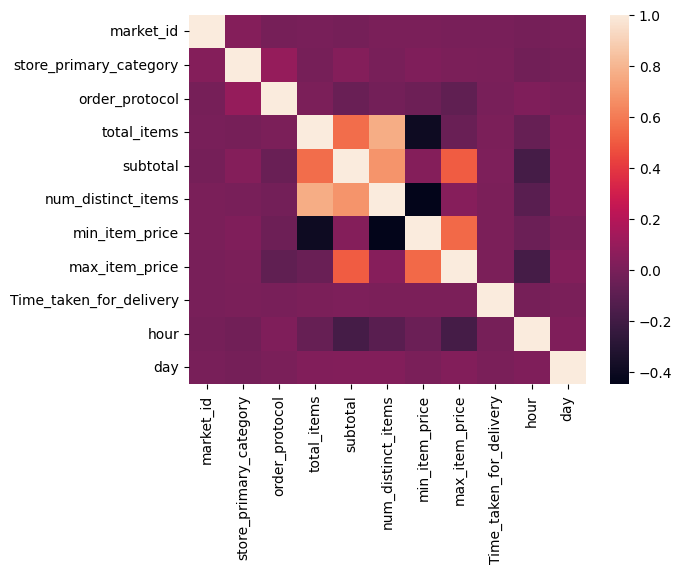

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

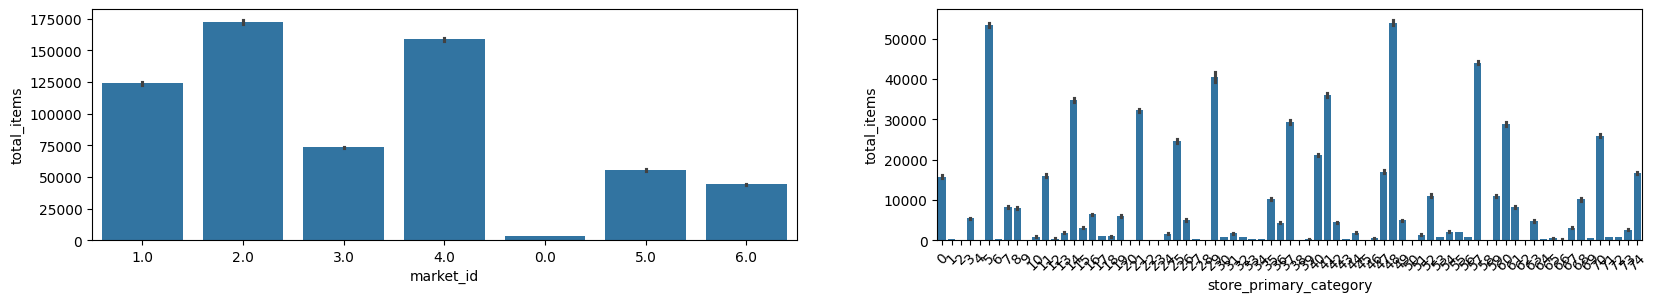

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.subplot(1,2,1)
sns.barplot(y='total_items',x='market_id',data=df,estimator='sum')
plt.subplot(1,2,2)
sns.barplot(y='total_items', x='store_primary_category', data=df, estimator='sum')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

<Axes: xlabel='order_protocol', ylabel='total_items'>

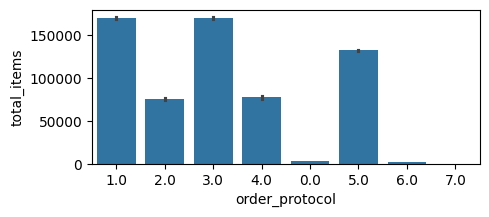

In [ ]:
plt.figure(figsize=(5,2))
sns.barplot(y='total_items',x='order_protocol',data=df,estimator='sum')

<Axes: xlabel='hour', ylabel='count'>

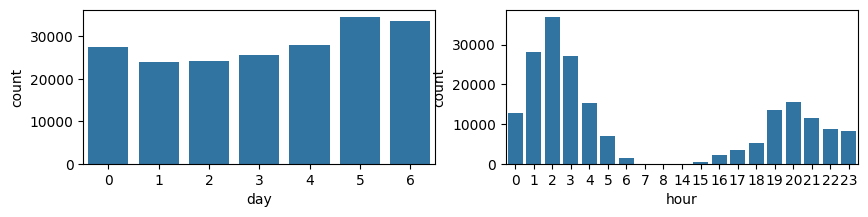

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.countplot(x=df['day'])
plt.subplot(122)
sns.countplot(x=df['hour'])

<Axes: xlabel='hour', ylabel='Time_taken_for_delivery'>

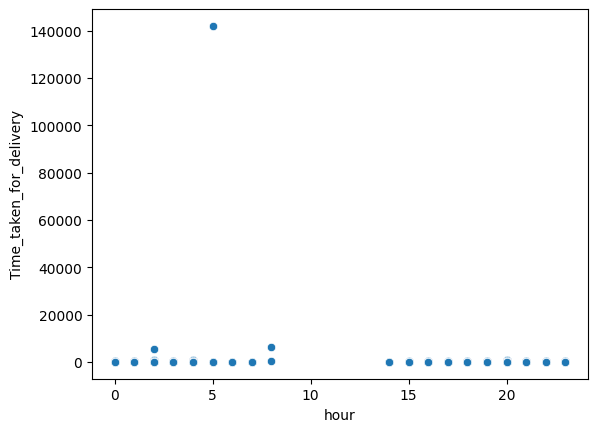

In [ ]:
sns.scatterplot(x='hour',y='Time_taken_for_delivery',data=df)

Detecting Outliers

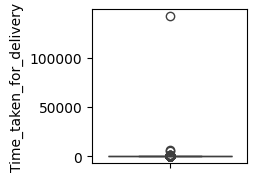

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

Removing Outliers

In [ ]:
print((df.loc[df['Time_taken_for_delivery'] >400].shape[0] / df.shape[0]) * 100)
df.drop(index=df.loc[df['Time_taken_for_delivery'] >400].index[0],inplace=True)

0.009624102805679234


Time taken for delivery more than 400 is 0.9%

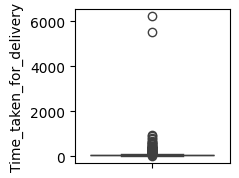

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

**Regression with neural networks**


*   Data scaling

*   Defining NN architecture

*   Trying different combinations and hyperparameters
*   Model training


*   Comparing results with random forest


In [ ]:
#Scalling the data to feed before neural network

from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)

# spliting the data
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

We will build a simple neural network to train our regression model it is a sequential model with two layers,

we have kept the number of nodes in the first layers equal to the number of input columns, and for the subsequent layers 32, 32, which can we changed or experimented with

the activation for the layers is kept as relu because it is a great non linear activation function that works for most cases, we could have used leaky relu if we see gradient vanishing.

the last layer has one node because it will give the single result that is our delivery time and the activation function for that should be linear

In [ ]:
# Build NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(11,kernel_initializer='normal',activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='Adam',metrics=['mse','mae'])
history=model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2001.5435 - mae: 38.6451 - mse: 2001.5435 - val_loss: 1361.1257 - val_mae: 14.7024 - val_mse: 1361.1257
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 418.6656 - mae: 14.3855 - mse: 418.6656 - val_loss: 1313.0360 - val_mae: 13.7209 - val_mse: 1313.0360
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 378.1847 - mae: 13.5042 - mse: 378.1847 - val_loss: 1288.3164 - val_mae: 13.4117 - val_mse: 1288.3164
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 365.8167 - mae: 13.1932 - mse: 365.8167 - val_loss: 1283.5695 - val_mae: 13.1978 - val_mse: 1283.5695
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 368.5957 - mae: 13.1160 - mse: 368.5957 - val_loss: 1282.6562 - val_mae: 13.2409 - val_mse: 1282.6562
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 372.2369 - mae: 13.2558 - mse: 372.2369 - val_loss: 1282.8749 - val_mae: 13.1804 - val_mse: 1282.8749
Epoch 7/10
247/247 ━━━━━━━

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 11)                  │             121 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,784 (18.69 KB)

 Trainable params: 1,594 (6.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,190 (12.46 KB)

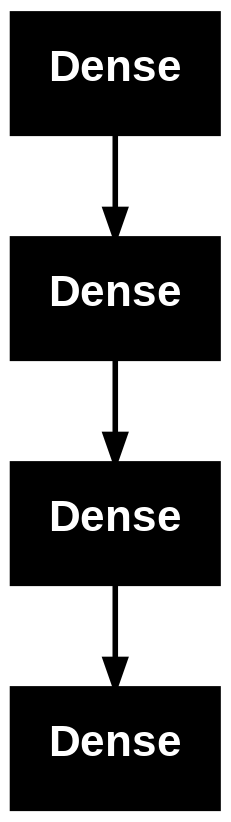

In [ ]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model)

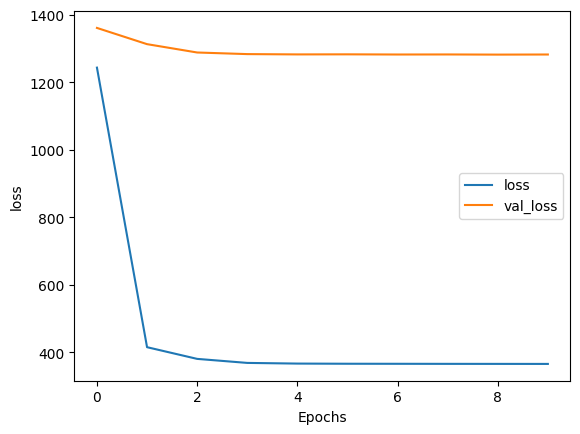

In [ ]:
    # PLot loss vs epochs
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend(['loss','val_loss'])
    plt.show()

In [ ]:
# Evaluation matrix
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mse**.5
mae = mean_absolute_error(y_test, model.predict(X_test))

1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, model.predict(X_test))

1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


0.3007677155664736

Evaluation matrix:
r2_score: 0.016921393987072375
mse :  1300.6893746333315
rmse :  36.06507139370906
mae :  13.278806810356807
mape : 0.30886126061209696